In [4]:
%matplotlib

Channels marked as bad: none
Using matplotlib backend: MacOSX


In [2]:
import mne
from pprint import pprint
import json
import csv
import numpy as np
import pandas as pd
from pathlib import Path
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)

/Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG
Extracting SQD Parameters from /Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG/LTTC_MEG_ALL_results/de022-2.con...
Creating Raw.info structure...
Setting channel info structure...
Creating Info structure...
Reading 0 ... 304999  =      0.000 ...   304.999 secs...
Ready.
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-12 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing or

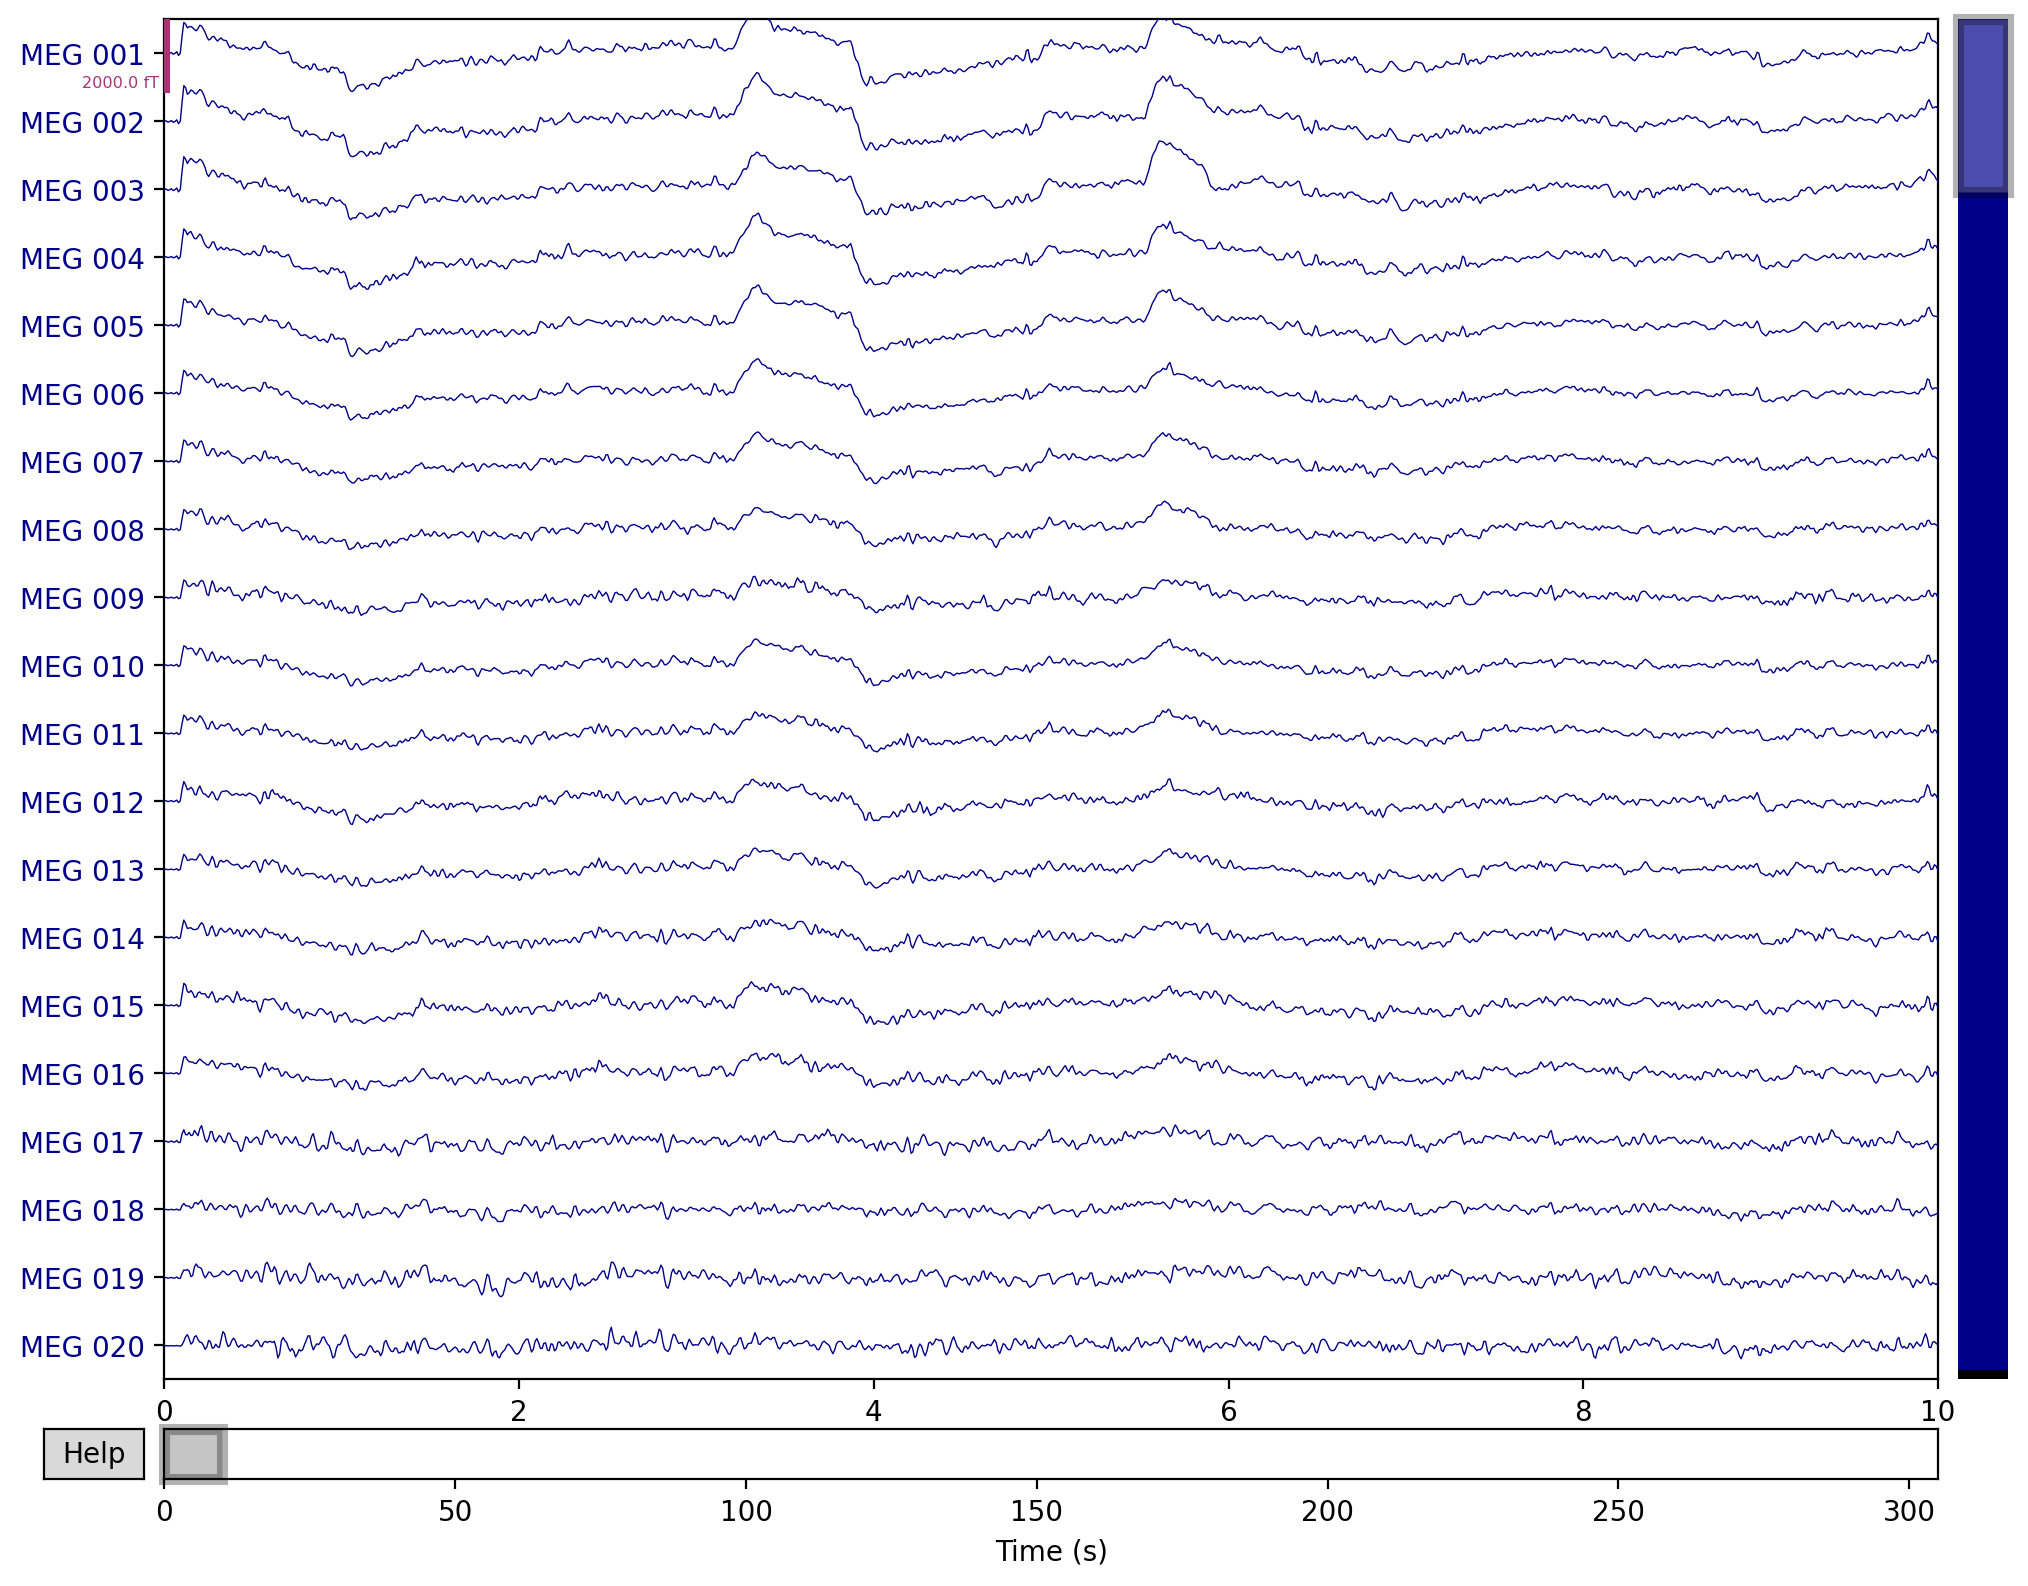

Channels marked as bad: none


In [39]:
root_data_path = Path("/Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG")
meg_data_path = root_data_path / "LTTC_MEG_ALL_results"

print(root_data_path)

sub_id = 22

LDT_confile = meg_data_path / Path('de%.3d-2.con' %sub_id) 
LDT_raw =  mne.io.read_raw_kit(LDT_confile, stim = [195], preload=True) #, slope = '+') #slope=將3個stim_channel的訊號全部加成,讓訊號增強
                                                                #把原始的KIT資料讀進來
#LDT_raw.plot()
#events = mne.find_events(LDT_raw, stim_channel='STI 014') #將集合而成的channel命名為STI 014

#LDT_raw.plot()
n_LDT_raw = LDT_raw.copy()

n_LDT_raw.load_data().pick_types(meg=True, stim=True).filter(0, 30, phase='zero-double').resample(500)
print(n_LDT_raw.info)
#print(events.shape)

n_LDT_raw.plot()

In [41]:
# ICA
ica_ = ICA(n_components=15, random_state=97)
ica_.fit(n_LDT_raw)
#ica_

#Plot ICA
ica_.plot_sources(n_LDT_raw)
ica_.plot_components()#sphere = (0.0, 0.02, 0.0, 0.065))  # What is this sphere for??
#ica_.plot_overlay(n_LDT_raw, exclude=[0, 5])  # 5 3 2 1

Fitting ICA to data using 157 channels (please be patient, this may take a while)


/opt/anaconda3/envs/eelbrain/lib/python3.9/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/eelbrain/lib/python3.9/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/var/folders/h7/sdf5cvgx3qzf5rh744693x0r0000gn/T/ipykernel_53014/4238994491.py:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica_.fit(n_LDT_raw)


Selecting by number: 15 components
Fitting ICA took 6.5s.
Creating RawArray with float64 data, n_channels=15, n_times=152500
    Range : 0 ... 152499 =      0.000 ...   304.998 secs
Ready.


/opt/anaconda3/envs/eelbrain/lib/python3.9/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/eelbrain/lib/python3.9/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/eelbrain/lib/python3.9/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/eelbrain/lib/python3.9/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/eelbrain/lib/python3.9/site-

[<MNEFigure size 1950x1463 with 15 Axes>]

In [42]:
# Checking for every component
for i in range(15):
    #ica_.plot_properties(n_raw, picks=[i])
    ica_.plot_overlay(n_LDT_raw, exclude=[i])

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing o

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 3 ICA components
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 157 PCA components


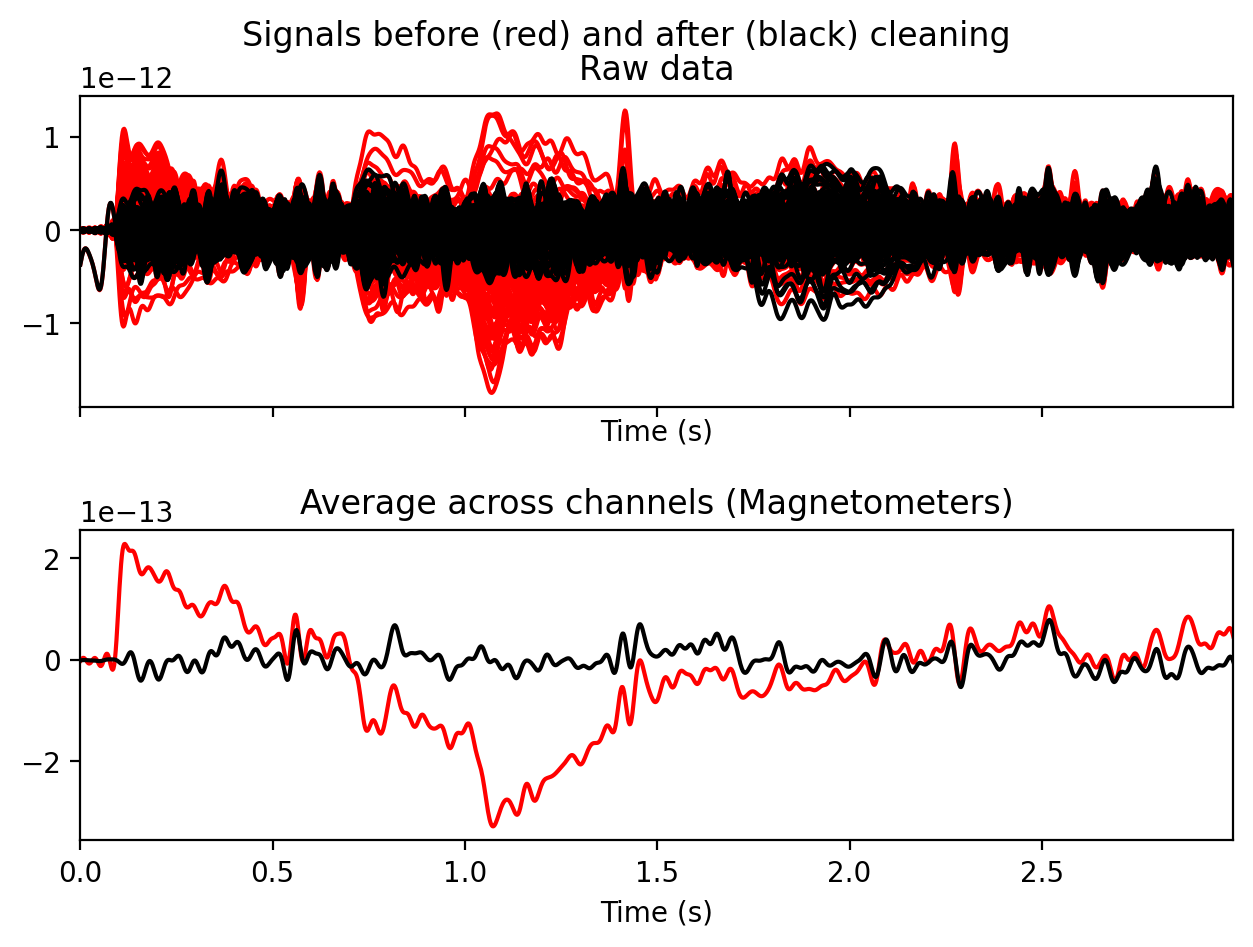

In [47]:
ica_.plot_overlay(n_LDT_raw, exclude=[0, 1, 3])
ica_.plot_overlay(n_LDT_raw, exclude=[0, 1])
ica_.plot_overlay(n_LDT_raw, exclude=[0, 3])

In [48]:
# ICAed epochs
# excluding wanted components
ica_.exclude = [0, 1]
ica_.plot_overlay(n_LDT_raw, exclude=ica_.exclude)

ica_.apply(n_LDT_raw) #changes the Raw object in-place, so let's make a copy first:
#n_LDT_raw.plot()

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 157 PCA components


<RawKIT | de022-2.con, 158 x 152500 (305.0 s), ~184.0 MB, data loaded>

In [49]:
# Creating the epochs(The Original one_without the tag of H&L-CD )
events = mne.find_events(n_LDT_raw, stim_channel='STI 014')  #just checking what stim_channel documenting what.
event_id = {'word_onset': 1}  

tmin = -0.1         								# pre stimulis interval (in seconds) #
tmax = 1       								# post stimulus interval #

baseline = (-0.1, 0)  # tmin ~ 0 , -0.1s-0s   
reject = dict(mag=4e-12)  # 5e-12 dropped so many

# Load in the channels layouts
kit_lay = mne.channels.read_layout("KIT-157")

#n_LDT_raw.load_data().pick_types(meg=True, stim=True).filter(0, 30, phase='zero-double').resample(500)
epoch_LDT = mne.Epochs(n_LDT_raw, events, event_id, tmin, tmax, baseline=baseline
                    , reject=reject,preload=True)

#epoch_LDT.plot()

Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
120 events found
Event IDs: [1]
Not setting metadata
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 120 events and 551 original time points ...
0 bad epochs dropped


In [24]:
# get to know the reason of bad epoch drop
print(epoch_LDT.drop_log)

((), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), ('MEG 117',), (), ())


In [12]:
# Load in the csv file of word onset
print(root_data_path)
csv_data = root_data_path / "All_PLDT_raw_results.csv"  # self-made LMM data form

sub_ansLIST = []
with open(csv_data, "r", encoding="UTF-8") as f:
    fileLIST = f.read().split("\n")
    fileLIST.pop(0)  # exclude the headlines
    fileLIST.pop(-1) # exclude the last one (blank)
    
    #pprint(fileLIST[0:10][2])
    pprint(fileLIST)
    print(len(fileLIST))

/Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG
['007,C,1,vaesow,1,0,1258.0,',
 '007,L,2,browmey,1,1,934.0,',
 '007,C,3,chaeviy,1,1,1609.0,',
 '007,L,4,baydiy,1,0,2044.0,',
 '007,H,5,laelaxst,1,1,1728.0,',
 '007,H,6,baepay,1,1,1038.0,',
 '007,H,7,weyaet,1,99,0.0,N/A',
 '007,C,8,paenliy,1,1,1276.0,',
 '007,C,9,maeskiy,1,1,2413.0,',
 '007,L,10,laeviy,1,0,2587.0,',
 '007,C,11,aegliy,1,1,1693.0,',
 '007,C,12,payliy,1,0,795.0,',
 '007,H,13,weyaet,2,0,1492.0,',
 '007,L,14,baydiy,2,99,0.0,N/A',
 '007,C,15,paenliy,2,0,1539.0,',
 '007,L,16,browmey,2,1,802.0,',
 '007,C,17,vaesow,2,0,957.0,',
 '007,C,18,chaeviy,2,1,1662.0,',
 '007,H,19,laelaxst,2,1,1725.0,',
 '007,C,20,maeskiy,2,0,2320.0,',
 '007,L,21,laeviy,2,0,1908.0,',
 '007,H,22,baepay,2,1,1181.0,',
 '007,C,23,payliy,2,0,795.0,',
 '007,C,24,aegliy,2,1,852.0,',
 '007,L,25,baydiy,3,1,2386.0,',
 '007,H,26,weyaet,3,1,2284.0,',
 '007,C,27,payliy,3,1,1895.0,',
 '007,H,28,laelaxst,3,1,1782.0,',
 '007,C,29,

 '022,L,83,browmey,7,1,1173.0,',
 '022,C,84,baepay,7,0,1084.0,',
 '022,H,85,maeskiy,8,1,1151.0,',
 '022,C,86,weyaet,8,0,1232.0,',
 '022,L,87,chaeviy,8,1,1177.0,',
 '022,C,88,baepay,8,1,2039.0,',
 '022,L,89,browmey,8,1,1403.0,',
 '022,C,90,laelaxst,8,0,1502.0,',
 '022,C,91,aegliy,8,0,1197.0,',
 '022,H,92,vaesow,8,1,1366.0,',
 '022,C,93,laeviy,8,1,994.0,',
 '022,L,94,payliy,8,1,1122.0,',
 '022,C,95,paenliy,8,0,1509.0,',
 '022,H,96,baydiy,8,0,1886.0,',
 '022,H,97,baydiy,9,1,1762.0,',
 '022,C,98,laeviy,9,1,1302.0,',
 '022,C,99,laelaxst,9,0,1093.0,',
 '022,C,100,aegliy,9,0,1018.0,',
 '022,L,101,chaeviy,9,1,1112.0,',
 '022,H,102,maeskiy,9,1,825.0,',
 '022,C,103,paenliy,9,0,882.0,',
 '022,L,104,payliy,9,1,717.0,',
 '022,H,105,vaesow,9,1,350.0,',
 '022,C,106,weyaet,9,0,1055.0,',
 '022,C,107,baepay,9,0,949.0,',
 '022,L,108,browmey,9,1,1318.0,',
 '022,H,109,maeskiy,10,1,937.0,',
 '022,L,110,browmey,10,1,815.0,',
 '022,H,111,baydiy,10,1,829.0,',
 '022,C,112,aegliy,10,0,798.0,',
 '022,C,113,paenli

In [50]:
# set up the sub_id into string
tmp_id = "%.3d" %sub_id   # 5678 =! 005~008 >> use %d
print(tmp_id)
print(type(tmp_id))

# create blank LIST for later use
sub_ansLIST = []

# create the LIST of the target sub's answer
for row in fileLIST:
    row = row.split(",")
    sub_id_STR = row[0]
    #print(sub_id_STR)
    #print(type(sub_id_STR))
    
    # check the sub_id in the whole dataset
    if sub_id_STR == tmp_id:
        sub_ansLIST.append(row)
    else:
        pass
        
pprint(sub_ansLIST)
print(len(sub_ansLIST))

022
<class 'str'>
[['022', 'C', '1', 'aegliy', '1', '0', '893.0', ''],
 ['022', 'C', '2', 'laelaxst', '1', '0', '855.0', ''],
 ['022', 'C', '3', 'baepay', '1', '0', '1307.0', ''],
 ['022', 'H', '4', 'maeskiy', '1', '1', '1515.0', ''],
 ['022', 'L', '5', 'chaeviy', '1', '0', '1140.0', ''],
 ['022', 'H', '6', 'baydiy', '1', '0', '1338.0', ''],
 ['022', 'C', '7', 'paenliy', '1', '0', '1385.0', ''],
 ['022', 'C', '8', 'laeviy', '1', '1', '1178.0', ''],
 ['022', 'L', '9', 'browmey', '1', '1', '1000.0', ''],
 ['022', 'H', '10', 'vaesow', '1', '1', '1268.0', ''],
 ['022', 'C', '11', 'weyaet', '1', '1', '1268.0', ''],
 ['022', 'L', '12', 'payliy', '1', '1', '1565.0', ''],
 ['022', 'H', '13', 'baydiy', '2', '0', '2536.0', ''],
 ['022', 'C', '14', 'laeviy', '2', '1', '1159.0', ''],
 ['022', 'C', '15', 'weyaet', '2', '0', '1923.0', ''],
 ['022', 'L', '16', 'browmey', '2', '1', '983.0', ''],
 ['022', 'L', '17', 'chaeviy', '2', '1', '1228.0', ''],
 ['022', 'C', '18', 'paenliy', '2', '1', '2533.0', 

In [51]:
all_eventsArray = events.copy()
#print(all_eventsArray[0][0])

# C == control group; H == H_CD; L == L_CD
# event_id >> C==9; H==1; L==2

C_LIST = []
H_LIST = []
L_LIST = []

# Change the event id according to the condition
for row in sub_ansLIST:
    #print(row)
    
    index_eventINT = sub_ansLIST.index(row)
    #print(index_eventINT)
    conditionSTR = row[1]
    #print(row[0], row[1])
    
    if conditionSTR == "C":
        #print(index_eventINT, "=", conditionSTR)
        all_eventsArray[index_eventINT][2] = 9
        #C_LIST.append(conditionSTR)

    if conditionSTR == "H":
        #print(index_eventINT, "=", conditionSTR)
        all_eventsArray[index_eventINT][2] = 1
        #H_LIST.append(conditionSTR)
        
    if conditionSTR == "L":       
        #print(index_eventINT, "=", conditionSTR)
        all_eventsArray[index_eventINT][2] = 2
        #L_LIST.append(conditionSTR)
    else:
        pass 

all_eventsArray

array([[  7393,      0,      9],
       [  8327,      0,      9],
       [  9260,      0,      9],
       [ 10419,      0,      1],
       [ 11679,      0,      2],
       [ 12752,      0,      1],
       [ 13925,      0,      9],
       [ 15124,      0,      9],
       [ 16217,      0,      2],
       [ 17223,      0,      1],
       [ 18363,      0,      9],
       [ 19503,      0,      2],
       [ 20789,      0,      1],
       [ 22561,      0,      9],
       [ 23648,      0,      9],
       [ 25114,      0,      2],
       [ 26107,      0,      2],
       [ 27226,      0,      9],
       [ 28999,      0,      1],
       [ 30099,      0,      9],
       [ 31151,      0,      9],
       [ 32111,      0,      9],
       [ 33171,      0,      1],
       [ 34410,      0,      2],
       [ 35483,      0,      9],
       [ 36756,      0,      9],
       [ 38182,      0,      9],
       [ 39528,      0,      9],
       [ 40888,      0,      1],
       [ 42007,      0,      2],
       [ 4

In [52]:
# Creating the new epochs
events = all_eventsArray  #mne.find_events(raw_ICAed, stim_channel='STI 014')  #just checking what stim_channel documenting what.
event_id = {'High_CD':1,'Low_CD':2, 'Control': 9}  

tmin = -0.1         								# pre stimulis interval (in seconds) #
tmax = 0.7          								# post stimulus interval #

baseline = (None, 0)  # tmin ~ 0 , -0.1s-0s   
reject = dict(mag=4e-12)

# Load in the channels layouts
kit_lay = mne.channels.read_layout("KIT-157")

n_LDT_raw.load_data().pick_types(meg=True, stim=False).filter(0, 30, phase= 'zero-double').resample(500)
n_epoch_LDT = mne.Epochs(n_LDT_raw, events, event_id, tmin, tmax,
                    baseline=baseline,
                    reject = reject, preload = True)

n_epoch_LDT

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-12 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 sec)

Not setting metadata
Not setting metadata
120 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 120 events and 401 original time points ...
0 bad epochs dropped


Number of events,120
Events,Control: 60High_CD: 30Low_CD: 30
Time range,-0.100 – 0.700 sec
Baseline,-0.100 – 0.000 sec


In [53]:
n_epoch_LDT.save(meg_data_path / Path('S%.3d_ICAed_LDT-epo.fif' %sub_id), overwrite=True)

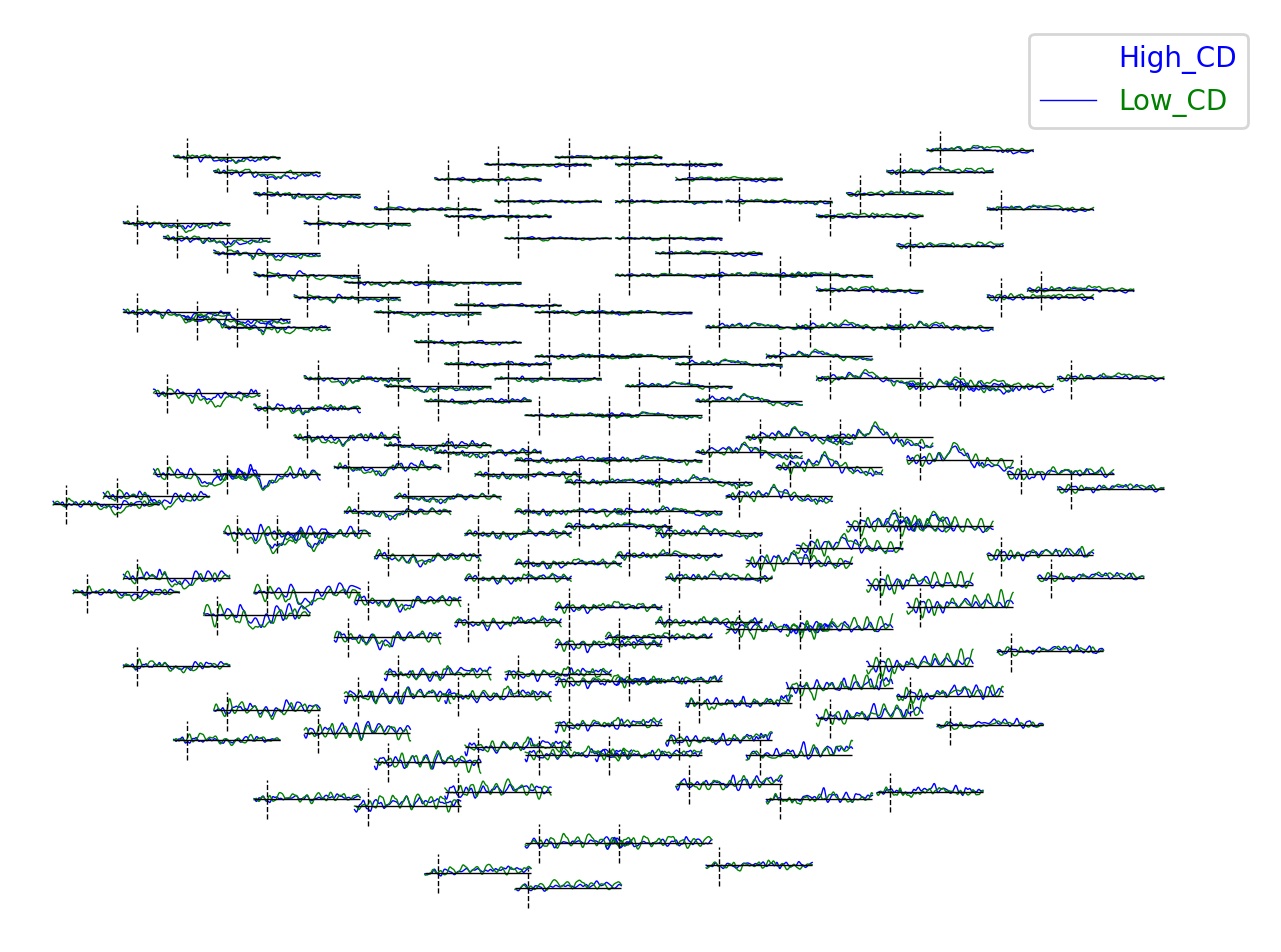

In [32]:
#evoked_C = n_epoch_LDT["Control"].average()
evoked_H = n_epoch_LDT["High_CD"].average()
evoked_L = n_epoch_LDT["Low_CD"].average()

#evoked_C.comment = 'Control'
evoked_H.comment = 'High_CD'
evoked_L.comment = 'Low_CD'

tmp = [evoked_H, evoked_L]#[evoked_C, evoked_H, evoked_L] 
colors = 'blue', 'green' #H:'blue'; L:'green'; C:'red'
mne.viz.plot_evoked_topo(tmp, color = colors)

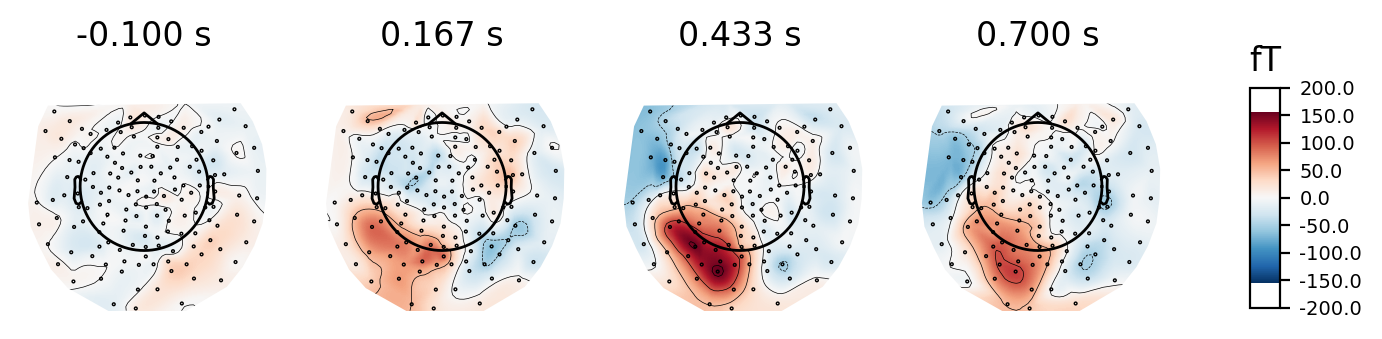

In [78]:
evoked_L.plot_topomap()

In [ ]:
# see the average of the epochs, I think

std_evoked = epochs['Standard (yi3)'].average().apply_baseline((-0.1, 0)).pick_types(eeg= True, stim = False).crop(-0.1, 0.7)
devL_evoked = epochs['Large deviant (yi1)'].average().apply_baseline((-0.1, 0)).pick_types(eeg= True, stim = False).crop(-0.1, 0.7)
devS_evoked = epochs['Small deviant (yi2)'].average().apply_baseline((-0.1, 0)).pick_types(eeg= True, stim = False).crop(-0.1, 0.7)

print(std_evoked)
print(devL_evoked)
print(devS_evoked)

In [ ]:
tmp = [std_evoked, devL_evoked, devS_evoked]
colors = 'red', 'blue', 'green'
#mne.viz.plot_evoked_topo(tmp, color = colors, title = 'MMN', ylim = dict(eeg=[10, -10]))
mne.viz.plot_compare_evokeds(tmp, colors = colors, axes = 'topo')